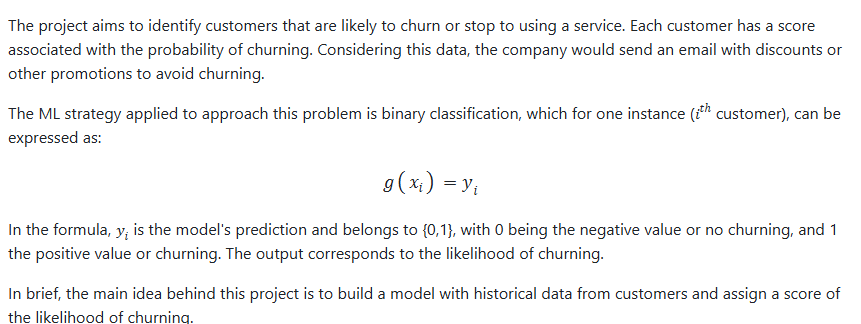
dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [2]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
 
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
!wget $data -O data-week-3.csv

--2026-01-06 17:05:00--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  4.22MB/s    in 0.2s    

2026-01-06 17:05:00 (4.22 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [3]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#To display all of them simultaneously, we can use the transpose function. This will switch the rows to become columns and the columns to become rows.
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Making column names and values look uniform

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
 
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
 
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
 
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [8]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [9]:
df.totalcharges = df.totalcharges.fillna(0)

In [10]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [11]:
df.churn = (df.churn == 'yes').astype(int)


In [12]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# Setting up the validation framework

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [18]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95


In [19]:
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [22]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [23]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

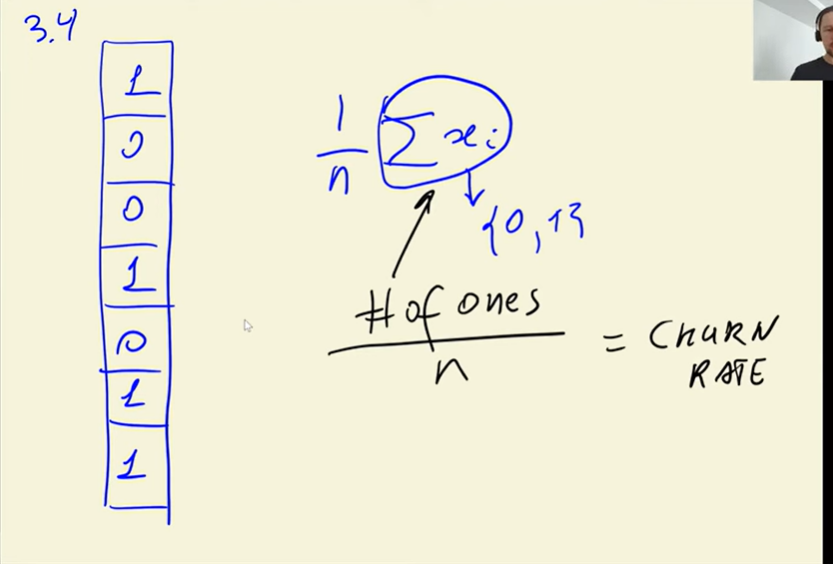

the reason why mean is givig the churn rate is because churn rate is equal to mean

In [24]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

np.float64(0.27)

In [25]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [26]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [27]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature importance : churn rate and risk ratio

### churn rate

In [28]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [29]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [30]:
global_churn - churn_female

np.float64(-0.006855983216553063)

In [31]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [32]:
 
global_churn - churn_male

np.float64(0.006754520462819769)

In [33]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [34]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [35]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [36]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [37]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [38]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

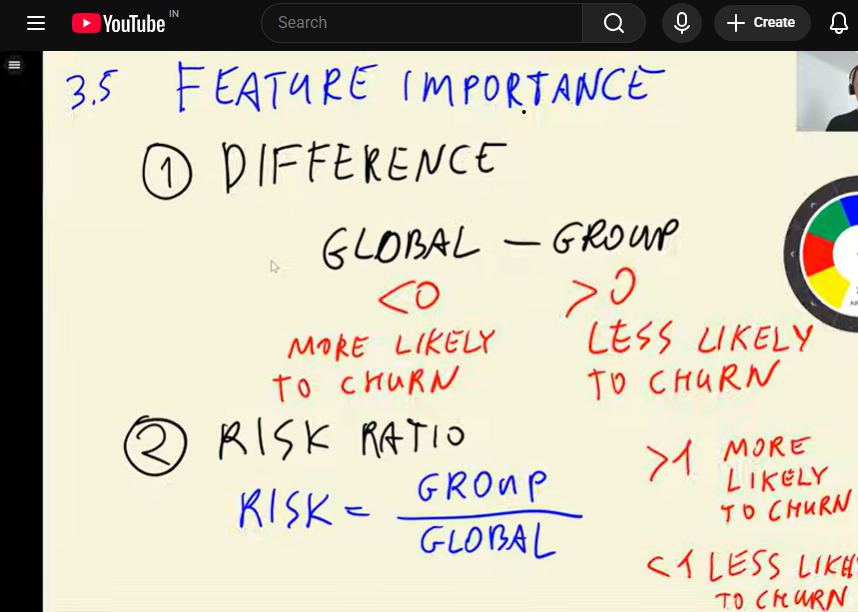
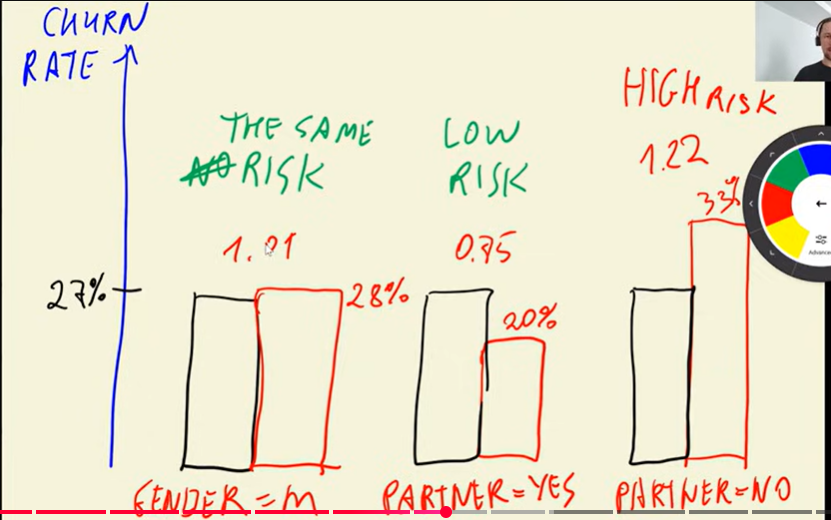

In [39]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [40]:
#risk of churning(high risk)
churn_partner / global_churn

np.float64(0.7594724924338315)

In [41]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [42]:
from IPython.display import display
 
for c in categorical:
    #print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


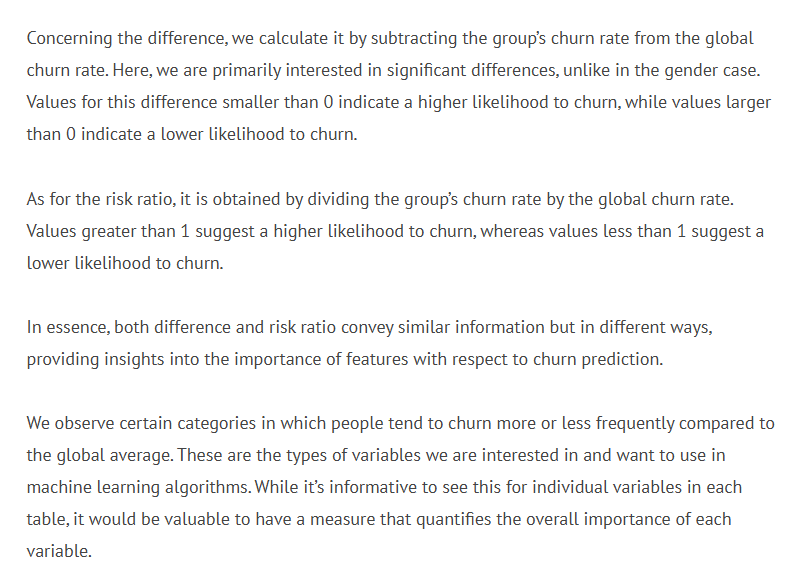

# Feature importance : mutual information

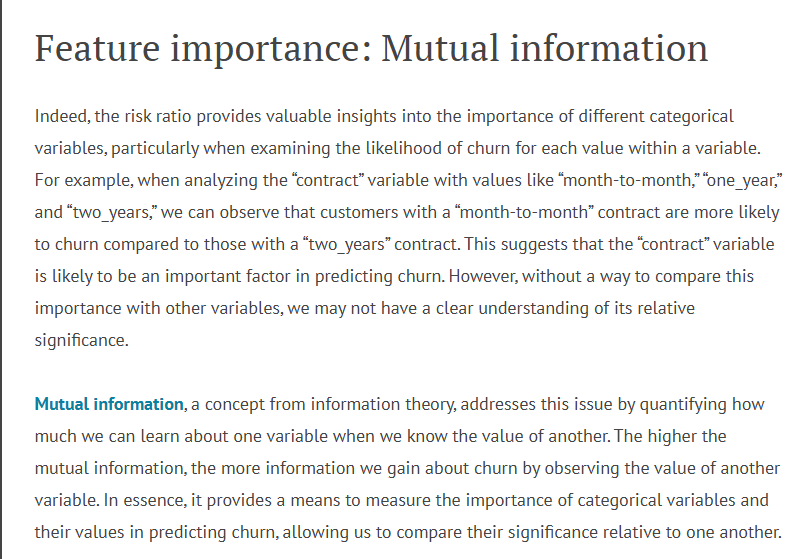

In [43]:
from sklearn.metrics import mutual_info_score
 


In [44]:
mutual_info_score(df_full_train.churn, df_full_train.contract)


0.0983203874041556

In [45]:

mutual_info_score(df_full_train.churn, df_full_train.gender) 


0.0001174846211139946

In [46]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [47]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)
 


In [48]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature importance: Correlation

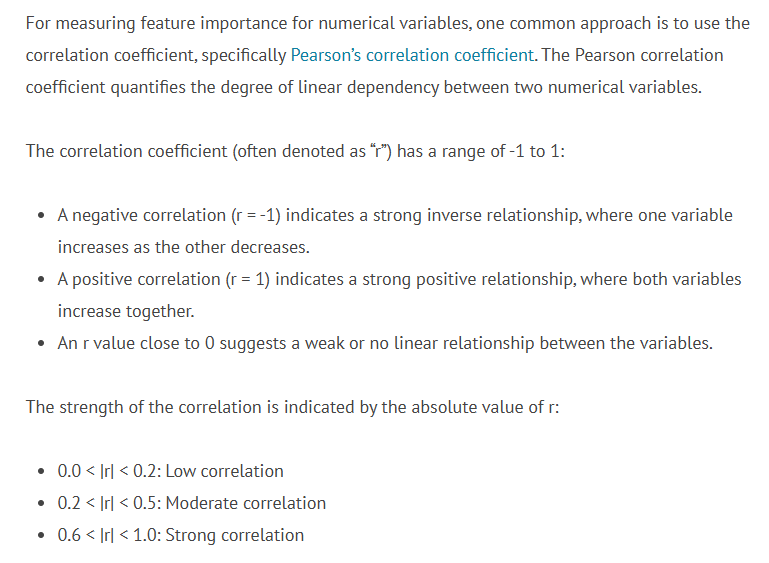

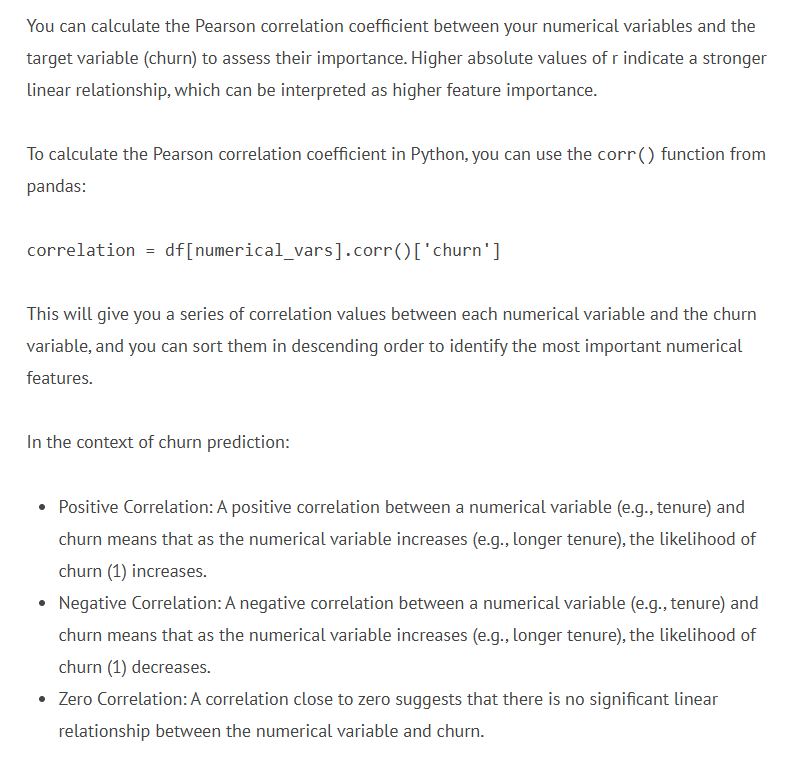

In [49]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [50]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [51]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [52]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [53]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [54]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [55]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [56]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()
# Output: 0.18340943683409436
 


np.float64(0.18340943683409436)

In [57]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()
# Output: 0.32499341585462205

np.float64(0.32499341585462205)

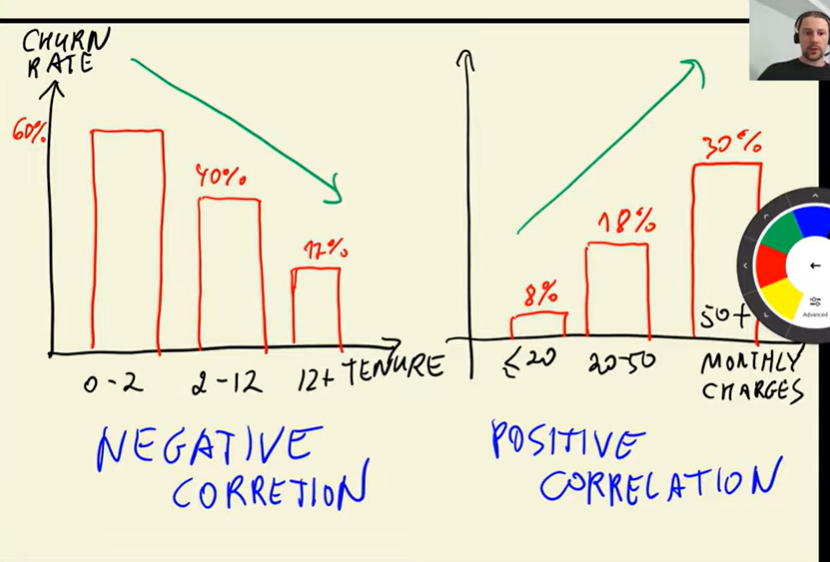

# One - hot encoding

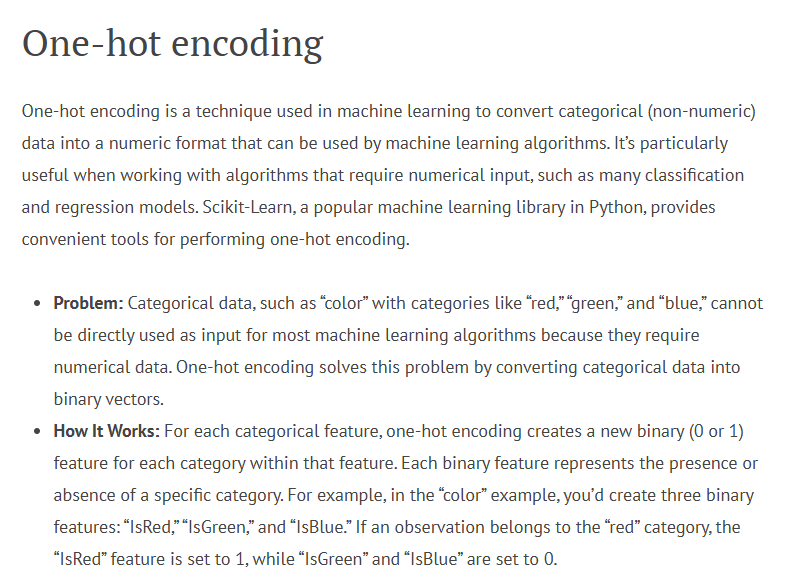

In [58]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [59]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()
 
dv.fit(dicts)

,"dtype dtype: dtype, default=np.float64The type of feature values. Passed to Numpy array/scipy.sparse matrixconstructors as the dtype argument.",<class 'numpy.float64'>
,"separator separator: str, default=""=""Separator string used when constructing new features for one-hotcoding.",'='
,"sparse sparse: bool, default=TrueWhether transform should produce scipy.sparse matrices.",True
,"sort sort: bool, default=TrueWhether ``feature_names_`` and ``vocabulary_`` should besorted when fitting.",True


In [60]:
dv.transform(dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (100, 5)>

In [61]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
 
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [62]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

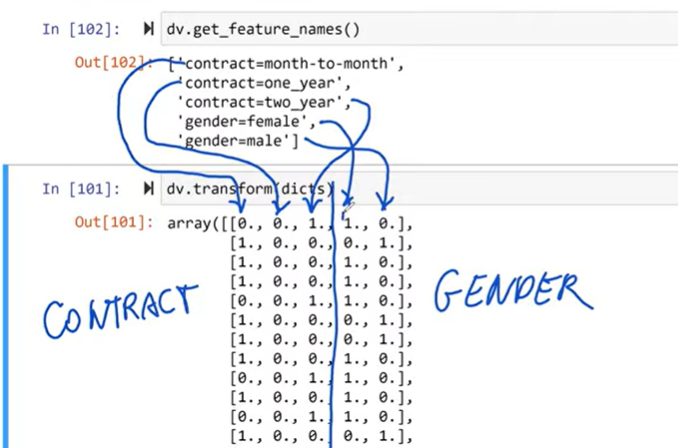

In [63]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [64]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
 
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [65]:
from sklearn.feature_extraction import DictVectorizer
 
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
 
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [66]:
X_train.shape

(4225, 45)

In [67]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# logistic regression

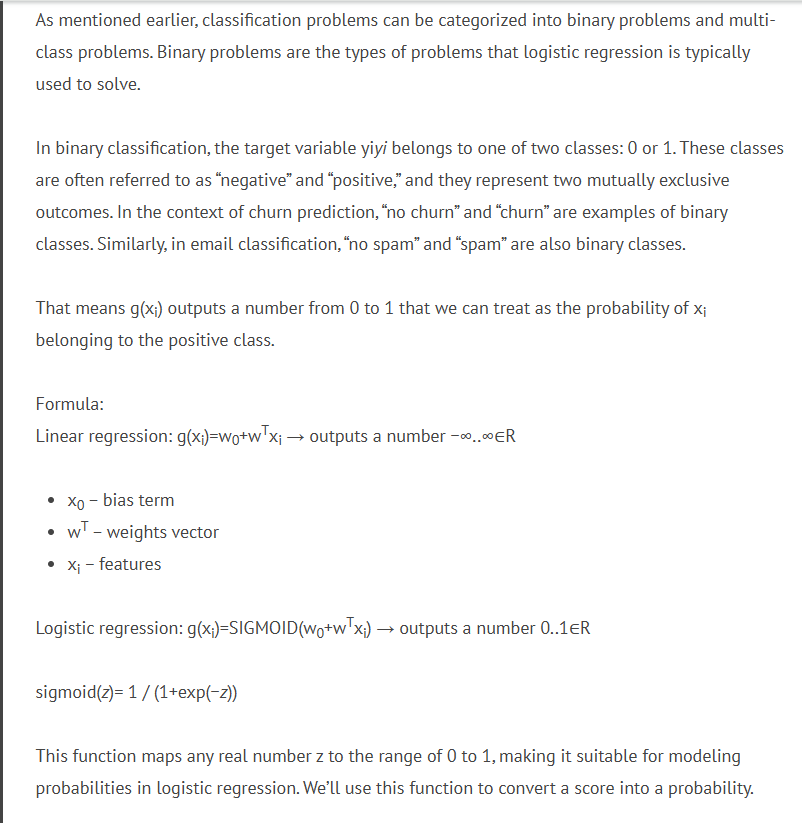

In [68]:
# Let’s see how to implement the sigmoid function and use it. We can create an array with 51 values between -7 and 7 using np.linspace(-7, 7, 51). This is our z in the next snippet.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [69]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
 
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [70]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

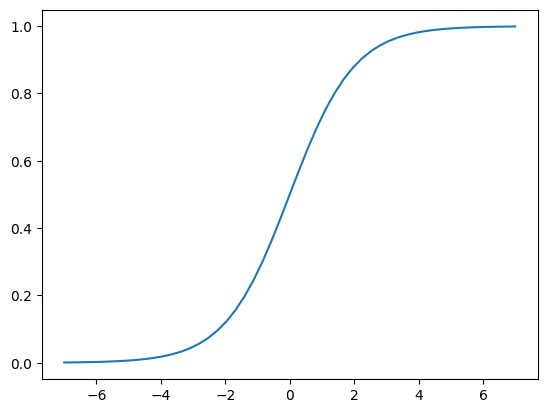

In [71]:
plt.plot(z, sigmoid(z))

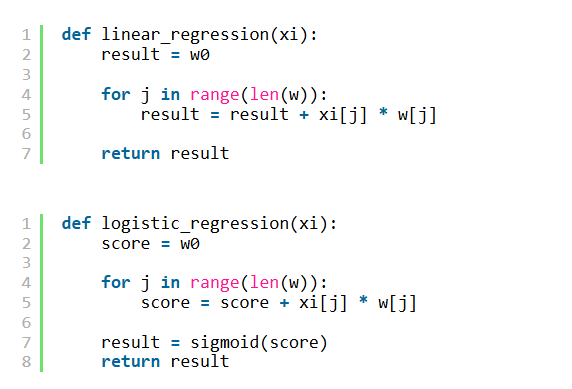

# Training logistic regression with scikit-learn

In [72]:
from sklearn.linear_model import LogisticRegression
 


In [73]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [74]:
model.coef_

array([[ 6.84563865e-01,  3.85627805e-02, -6.82106720e-01,
         5.59874182e-02, -1.49674921e-02,  1.13934134e-01,
        -1.59961569e-01,  8.70473614e-02,  3.94140853e-02,
         1.60584095e-03, -4.97473553e-01,  6.98455049e-01,
        -1.59961569e-01, -1.79930514e-02, -1.87166364e-01,
         6.61224966e-02,  1.62063794e-01,  1.16725547e-01,
        -1.59961569e-01,  8.42559483e-02,  2.85032504e-01,
        -1.59961569e-01, -8.40510084e-02, -1.61238079e-01,
         2.02258005e-01, -4.45575410e-02,  8.55774672e-02,
        -5.15350530e-02, -2.96985505e-03,  1.06354594e-01,
        -1.08297599e-02,  6.61224966e-02, -2.51025705e-02,
         1.93985926e-01, -9.41528635e-02, -1.59961569e-01,
         2.95134358e-01, -5.39335450e-02, -1.59961569e-01,
         2.54915040e-01,  2.35033033e-01, -1.59961569e-01,
        -3.40515382e-02, -6.85347146e-02,  3.95932211e-04]])

In [75]:
model.coef_[0].round(3)

array([ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
        0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
        0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
        0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
       -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
        0.235, -0.16 , -0.034, -0.069,  0.   ])

In [76]:
model.intercept_

array([-0.04532338])

In [77]:
model.intercept_[0]

np.float64(-0.045323382519725265)

In [78]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [79]:
model.predict_proba(X_train)

array([[0.92737411, 0.07262589],
       [0.32428383, 0.67571617],
       [0.36935502, 0.63064498],
       ...,
       [0.48795432, 0.51204568],
       [0.97453476, 0.02546524],
       [0.30652661, 0.69347339]], shape=(4225, 2))

In [80]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.0066238 , 0.20482253, 0.21781799, ..., 0.15149644, 0.78847856,
       0.81190391], shape=(1409,))

In [81]:
churn_decision = y_pred >0.5
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [82]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [83]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [84]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [85]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [86]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.006624,0,0,True
1,0.204823,0,0,True
2,0.217818,0,0,True
3,0.563750,1,1,True
4,0.218675,0,0,True
...,...,...,...,...
1404,0.291307,0,0,True
1405,0.041390,0,1,False
1406,0.151496,0,0,True
1407,0.788479,1,1,True


In [87]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

# model interpretation

In [88]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [89]:
model.coef_[0].round(3)

array([ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
        0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
        0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
        0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
       -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
        0.235, -0.16 , -0.034, -0.069,  0.   ])

In [90]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('contract=month-to-month', np.float64(0.685)),
 ('contract=one_year', np.float64(0.039)),
 ('contract=two_year', np.float64(-0.682)),
 ('dependents=no', np.float64(0.056)),
 ('dependents=yes', np.float64(-0.015)),
 ('deviceprotection=no', np.float64(0.114)),
 ('deviceprotection=no_internet_service', np.float64(-0.16)),
 ('deviceprotection=yes', np.float64(0.087)),
 ('gender=female', np.float64(0.039)),
 ('gender=male', np.float64(0.002)),
 ('internetservice=dsl', np.float64(-0.497)),
 ('internetservice=fiber_optic', np.float64(0.698)),
 ('internetservice=no', np.float64(-0.16)),
 ('monthlycharges', np.float64(-0.018)),
 ('multiplelines=no', np.float64(-0.187)),
 ('multiplelines=no_phone_service', np.float64(0.066)),
 ('multiplelines=yes', np.float64(0.162)),
 ('onlinebackup=no', np.float64(0.117)),
 ('onlinebackup=no_internet_service', np.float64(-0.16)),
 ('onlinebackup=yes', np.float64(0.084)),
 ('onlinesecurity=no', np.float64(0.285)),
 ('onlinesecurity=no_internet_service', np.fl

In [91]:
small = ['contract', 'tenure', 'monthlycharges']
 
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [92]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [93]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')
 
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,"dtype dtype: dtype, default=np.float64The type of feature values. Passed to Numpy array/scipy.sparse matrixconstructors as the dtype argument.",<class 'numpy.float64'>
,"separator separator: str, default=""=""Separator string used when constructing new features for one-hotcoding.",'='
,"sparse sparse: bool, default=TrueWhether transform should produce scipy.sparse matrices.",False
,"sort sort: bool, default=TrueWhether ``feature_names_`` and ``vocabulary_`` should besorted when fitting.",True


In [94]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [95]:
X_train_small = dv_small.transform(dicts_train_small)
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)
 
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [96]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [97]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

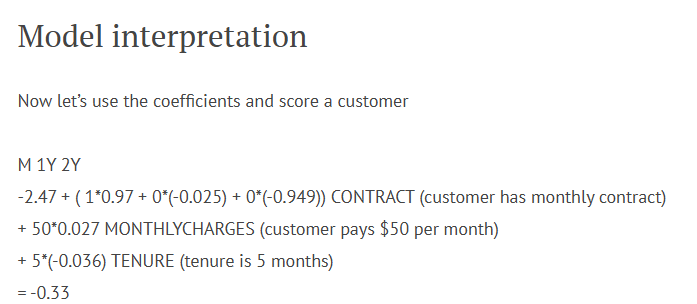

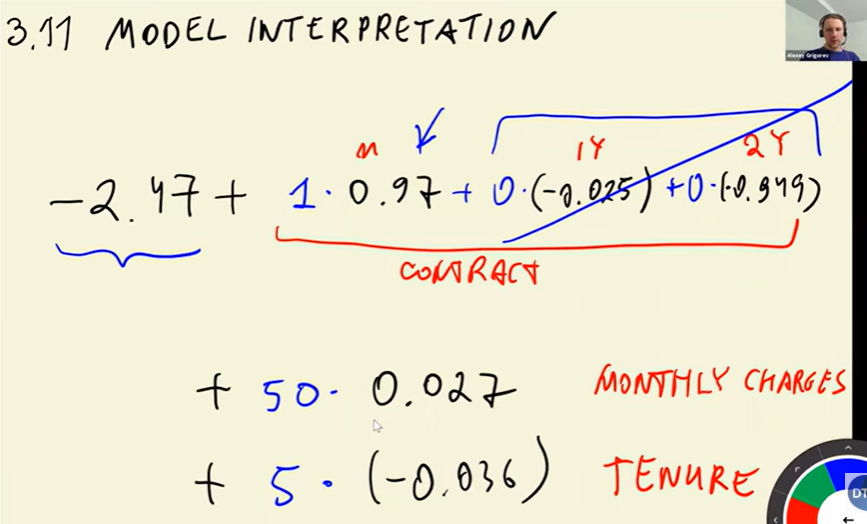

In [98]:
sigmoid(-2.47)

np.float64(0.07798823512936635)

In [99]:
sigmoid(-2.47+0.97)

np.float64(0.18242552380635632)

In [100]:
sigmoid(-2.47 + 0.97 + 50*0.027)

np.float64(0.46257015465625034)

In [101]:
sigmoid(-2.47 + 0.97 + 50*0.027 + 5*(-0.036))

np.float64(0.41824062315816374)

In [102]:
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

-0.3300000000000001

In [103]:
# '_' is a magic variable in Jupyter and means take the output of the last cell
sigmoid(_)

np.float64(0.41824062315816374)

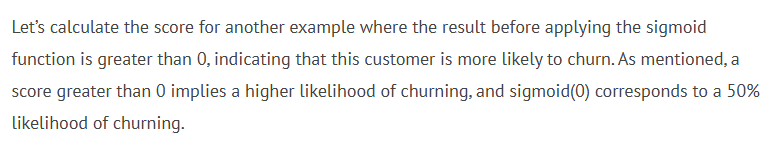

In [104]:
-2.47 + 0.97 + 60*0.027 + 1*(-0.036)

0.08399999999999966

In [105]:
sigmoid(_)

np.float64(0.5209876607065322)

In [106]:
-2.47 + (-0.949) + 30*0.027 + 24*(-0.036)

-3.473

In [107]:
sigmoid(_)

np.float64(0.030090303318277657)

# Using the model

In [108]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [109]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [110]:
# create DictVectorizer
dv = DictVectorizer(sparse=False)
 
# from this dictionaries we get the feature matrix
X_full_train = dv.fit_transform(dicts_full_train)

In [111]:
# then we train a model on this feature matrix
y_full_train = df_full_train.churn.values
model = LogisticRegression(max_iter=10000)
model.fit(X_full_train, y_full_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [112]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [113]:
# do the predictions
y_pred = model.predict_proba(X_test)[:, 1]

In [114]:
# compute accuracy
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

np.float64(0.8105039034776437)

In [115]:
customer = dicts_test[10]

In [116]:
X_small=dv.transform([customer])

In [117]:
model.predict_proba(X_small)[0,1]

np.float64(0.47632824241018595)

In [118]:
y_test[10]

np.int64(0)

In [119]:
customer = dicts_test[-1]
X_small = dv.transform([customer])
model.predict_proba(X_small)[0,1]
 

np.float64(0.6375704661276868)

In [120]:
y_test[-1]

np.int64(1)

# Accuracy

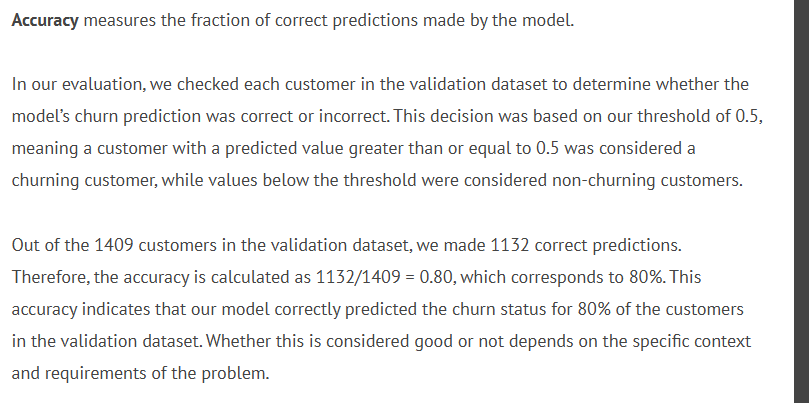

In [121]:
len(y_val)

1409

In [122]:
(y_val == churn_decision).sum()

np.int64(868)

In [123]:
(y_val == churn_decision).mean()

np.float64(0.6160397444996452)

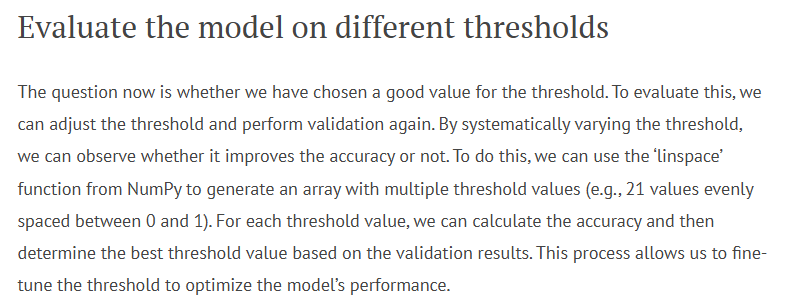

In [124]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [125]:
scores = []
 
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.414
0.10 0.458
0.15 0.480
0.20 0.501
0.25 0.531
0.30 0.539
0.35 0.559
0.40 0.575
0.45 0.595
0.50 0.616
0.55 0.625
0.60 0.651
0.65 0.676
0.70 0.695
0.75 0.711
0.80 0.722
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


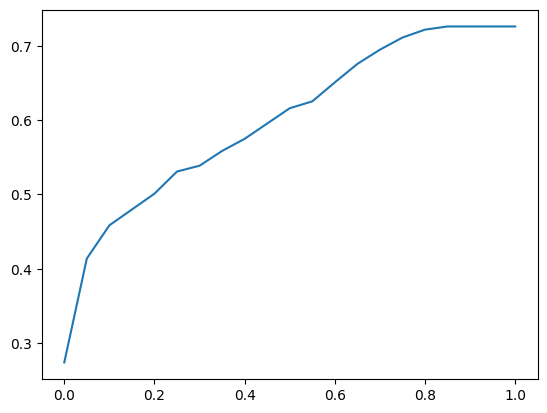

In [126]:
plt.plot(thresholds,scores)

In [127]:
from sklearn.metrics import accuracy_score
 
thresholds = np.linspace(0, 1, 21)
scores = []
 
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.414
0.10 0.458
0.15 0.480
0.20 0.501
0.25 0.531
0.30 0.539
0.35 0.559
0.40 0.575
0.45 0.595
0.50 0.616
0.55 0.625
0.60 0.651
0.65 0.676
0.70 0.695
0.75 0.711
0.80 0.722
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


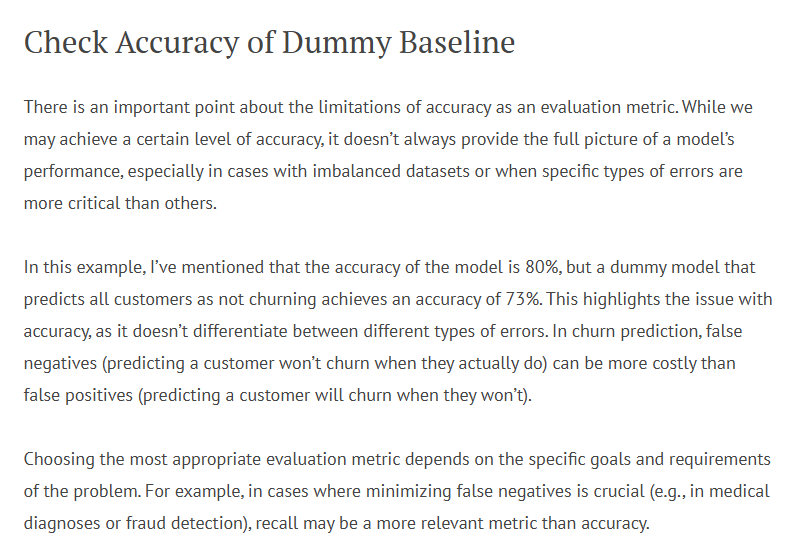

In [128]:
from collections import Counter

In [129]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [130]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [131]:
y_val.mean()

np.float64(0.2739531582682754)

In [132]:
1 - y_val.mean()

np.float64(0.7260468417317246)

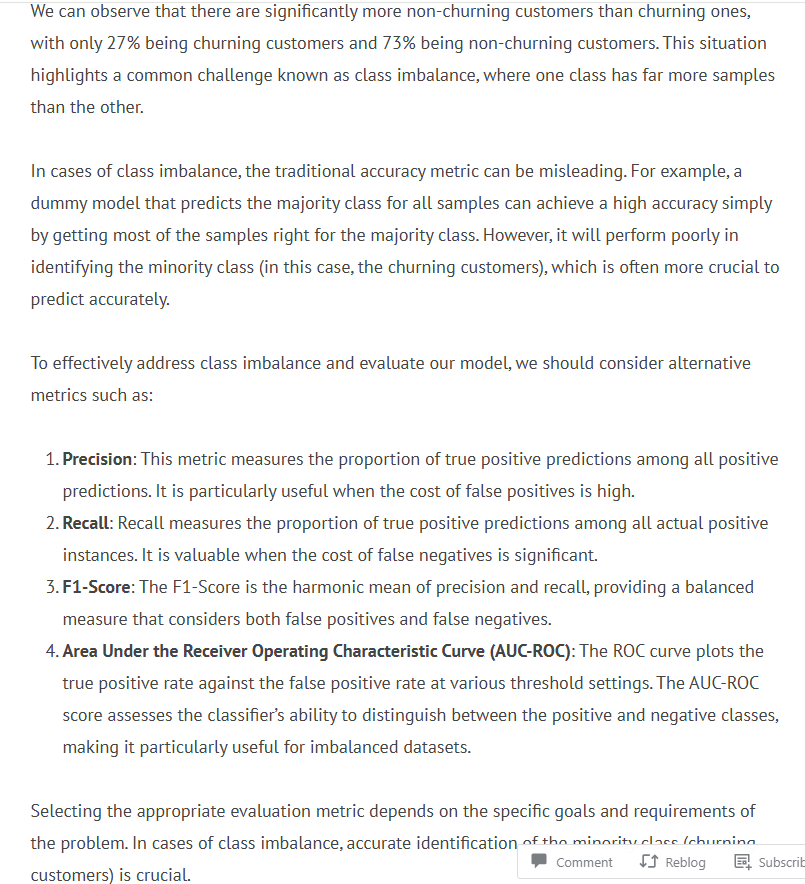

# confusion tables

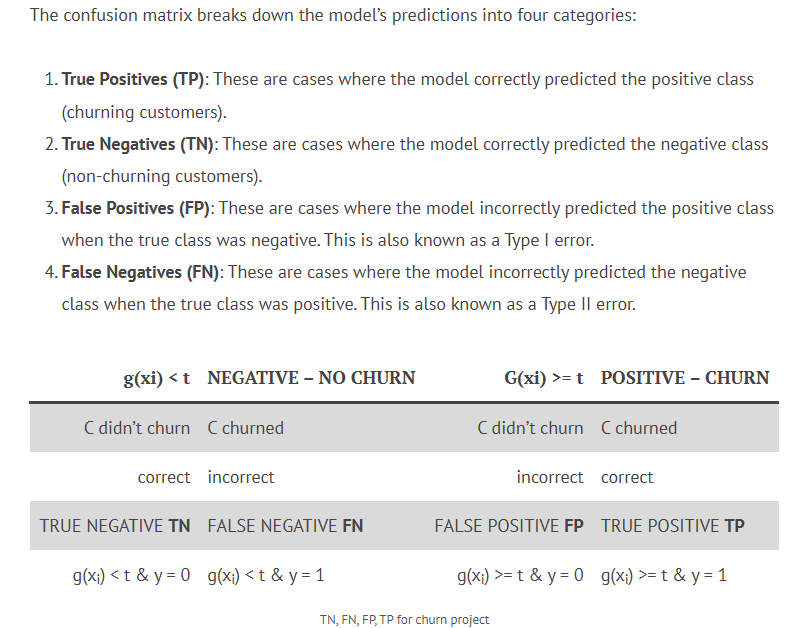

In [133]:
# people who are going to churn
actual_positive = (y_val == 1)

In [134]:
# people who are not going to churn
actual_negative = (y_val == 0)

In [135]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [136]:
predict_positive & actual_positive

array([False, False, False, ..., False, False,  True], shape=(1409,))

In [137]:
tp = (predict_positive & actual_positive).sum()
tp

np.int64(86)

In [138]:
tn = (predict_negative & actual_negative).sum()
tn

np.int64(782)

In [139]:
fp = (predict_positive & actual_negative).sum()
fp

np.int64(241)

In [140]:
fn = (predict_negative & actual_positive).sum()
fn

np.int64(300)

In [141]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [142]:
confusion_matrix

array([[782, 241],
       [300,  86]])

In [143]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.56, 0.17],
       [0.21, 0.06]])

# precision and recall

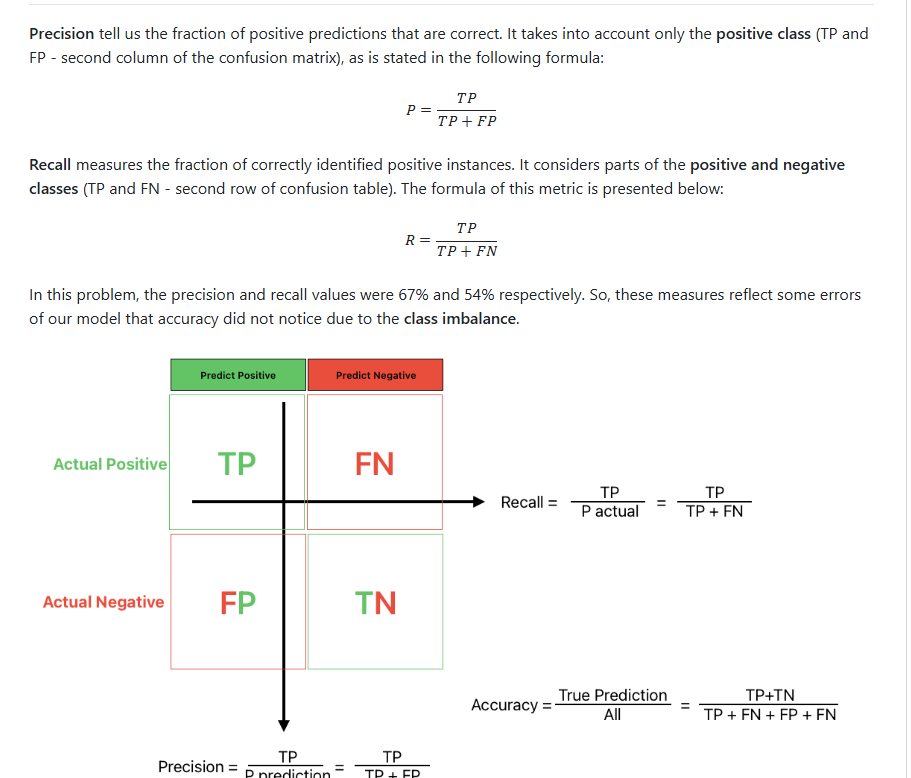

In [144]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

np.float64(0.6160397444996452)

In [145]:
precision = tp / (tp + fp)
precision

np.float64(0.26299694189602446)

In [146]:
# --> promotional email goes to 311 people, but 210 are actually going to churn (--> 33% are mistakes)
tp + fp

np.int64(327)

In [147]:
recall = tp / (tp + fn)
recall

np.float64(0.22279792746113988)

In [148]:
# --> For 46% of people who are churning we failed to identify them
tp + fn

np.int64(386)

# ROC CURVE

TPR and FRP

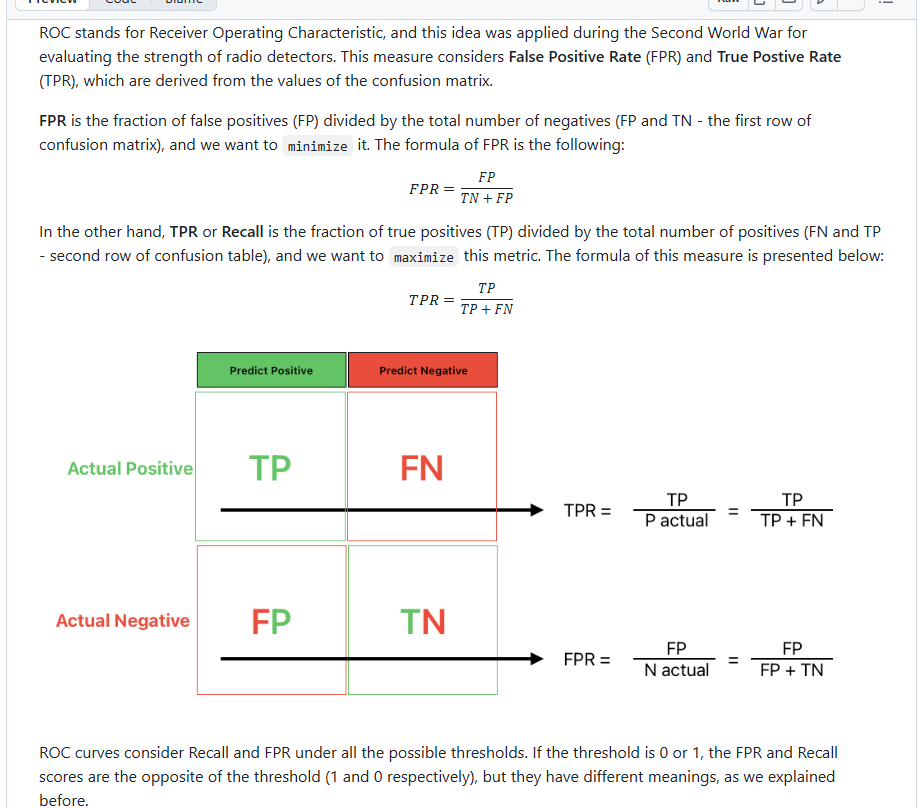

In [149]:
tpr = tp / (tp + fn)
tpr
#same as recall

np.float64(0.22279792746113988)

In [150]:
fpr = fp / (fp + tn)
fpr

np.float64(0.23558162267839688)

In [151]:
scores = []
thresholds = np.linspace(0, 1, 101)
 
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
 
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
 
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
 
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
 
    scores.append((t, tp, tn, fp, fn))
 
scores

[(np.float64(0.0), np.int64(386), np.int64(0), np.int64(1023), np.int64(0)),
 (np.float64(0.01), np.int64(352), np.int64(113), np.int64(910), np.int64(34)),
 (np.float64(0.02), np.int64(330), np.int64(171), np.int64(852), np.int64(56)),
 (np.float64(0.03), np.int64(322), np.int64(221), np.int64(802), np.int64(64)),
 (np.float64(0.04), np.int64(307), np.int64(258), np.int64(765), np.int64(79)),
 (np.float64(0.05), np.int64(294), np.int64(289), np.int64(734), np.int64(92)),
 (np.float64(0.06),
  np.int64(282),
  np.int64(315),
  np.int64(708),
  np.int64(104)),
 (np.float64(0.07),
  np.int64(275),
  np.int64(337),
  np.int64(686),
  np.int64(111)),
 (np.float64(0.08),
  np.int64(261),
  np.int64(364),
  np.int64(659),
  np.int64(125)),
 (np.float64(0.09),
  np.int64(254),
  np.int64(387),
  np.int64(636),
  np.int64(132)),
 (np.float64(0.1), np.int64(244), np.int64(402), np.int64(621), np.int64(142)),
 (np.float64(0.11),
  np.int64(239),
  np.int64(415),
  np.int64(608),
  np.int64(147))

In [152]:
columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,tn,fp,fn
0,0.00,386,0,1023,0
1,0.01,352,113,910,34
2,0.02,330,171,852,56
3,0.03,322,221,802,64
4,0.04,307,258,765,79
...,...,...,...,...,...
96,0.96,0,1023,0,386
97,0.97,0,1023,0,386
98,0.98,0,1023,0,386
99,0.99,0,1023,0,386


In [153]:
df_scores[::10]

,threshold,tp,tn,fp,fn
0,0.0,386,0,1023,0
10,0.1,244,402,621,142
20,0.2,188,518,505,198
30,0.3,143,616,407,243
40,0.4,114,696,327,272
50,0.5,86,782,241,300
60,0.6,52,865,158,334
70,0.7,23,956,67,363
80,0.8,1,1016,7,385
90,0.9,0,1023,0,386


In [154]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,244,402,621,142,0.632124,0.607038
20,0.2,188,518,505,198,0.487047,0.493646
30,0.3,143,616,407,243,0.370466,0.397849
40,0.4,114,696,327,272,0.295337,0.319648
50,0.5,86,782,241,300,0.222798,0.235582
60,0.6,52,865,158,334,0.134715,0.154448
70,0.7,23,956,67,363,0.059585,0.065494
80,0.8,1,1016,7,385,0.002591,0.006843
90,0.9,0,1023,0,386,0.000000,0.000000


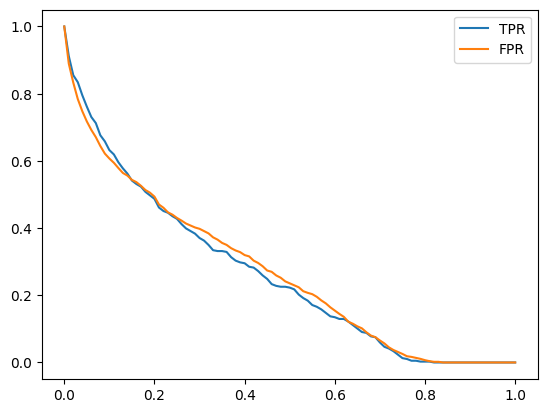

In [155]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

# Random model

In [156]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089], shape=(1409,))

In [157]:
# Accuracy for our random model is around 50%
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [158]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
 
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
 
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
 
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
 
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
 
        scores.append((t, tp, tn, fp, fn))
 
    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)
 
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
 
    return df_scores

In [159]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.898964,0.902248
20,0.2,307,201,822,79,0.795337,0.803519
30,0.3,276,299,724,110,0.715026,0.707722
40,0.4,237,399,624,149,0.613990,0.609971
50,0.5,202,505,518,184,0.523316,0.506354
60,0.6,161,614,409,225,0.417098,0.399804
70,0.7,121,721,302,265,0.313472,0.295210
80,0.8,78,817,206,308,0.202073,0.201369
90,0.9,40,922,101,346,0.103627,0.098729


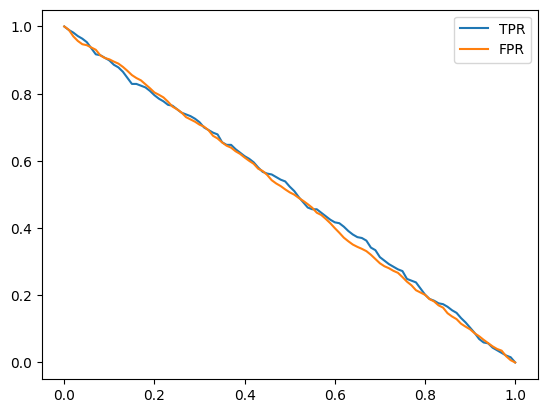

In [160]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

# Ideal model

In [161]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [162]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [163]:
y_ideal_pred = np.linspace(0, 1, len(y_ideal))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00], shape=(1409,))

In [164]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [165]:
accuracy_ideal = ((y_ideal_pred >= 0.726) == y_ideal).mean()
accuracy_ideal

np.float64(1.0)

In [166]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,386,141,882,0,1.000000,0.862170
20,0.2,386,282,741,0,1.000000,0.724340
30,0.3,386,423,600,0,1.000000,0.586510
40,0.4,386,564,459,0,1.000000,0.448680
50,0.5,386,704,319,0,1.000000,0.311828
60,0.6,386,845,178,0,1.000000,0.173998
70,0.7,386,986,37,0,1.000000,0.036168
80,0.8,282,1023,0,104,0.730570,0.000000
90,0.9,141,1023,0,245,0.365285,0.000000


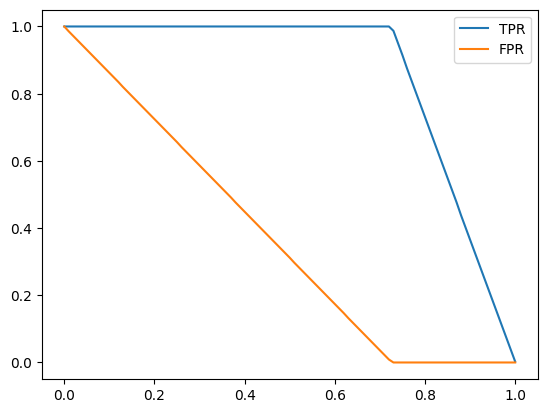

In [167]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

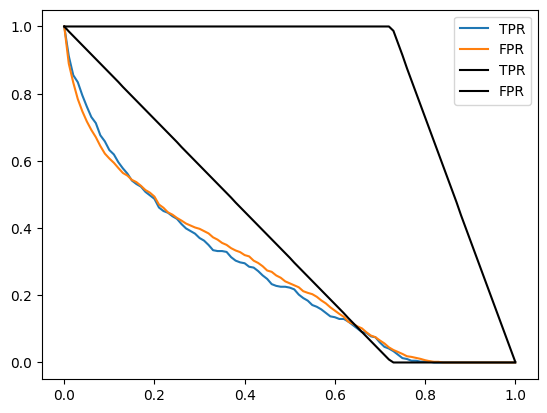

In [168]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
 
#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
 
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color = 'black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color = 'black')
 
plt.legend()

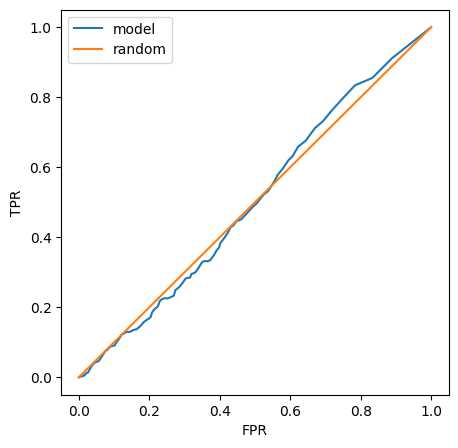

In [169]:
plt.figure(figsize=(5,5))
 
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1], [0,1], label='random')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

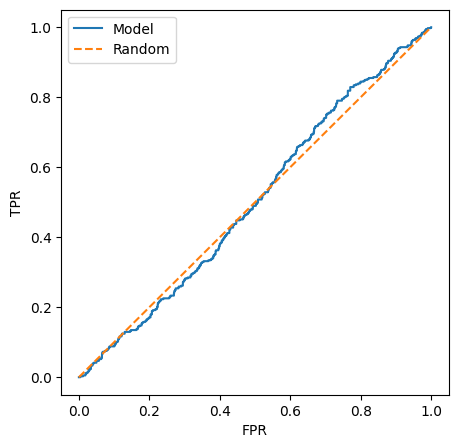

In [170]:
# We can also use the ROC functionality of scikit learn package
from sklearn.metrics import roc_curve
 
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
 
plt.figure(figsize=(5,5))
 
plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0,1], label='Random', linestyle='--')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

In [171]:
from sklearn.metrics import auc
# auc needs values for x-axis and y-axis
auc(fpr, tpr)

0.5039746453334953

In [172]:
auc(df_scores.fpr, df_scores.tpr)

0.503945522414518

In [173]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [174]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.5039746453334953

In [181]:
#There is a shortcut in scikit-learn package
from sklearn.metrics import roc_auc_score
 
roc_auc_score(y_val, y_pred)

0.5039746453334953

AUC tells us the probability that a randomly selected positive example has a score that is higher than a randomly selected negative example.

In [176]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [177]:
import random
pos_ind = random.randint(0, len(pos) -1)
neg_ind = random.randint(0, len(neg) -1)

In [178]:
pos[pos_ind] > neg[neg_ind]

np.False_

In [179]:
n = 100000
success = 0
 
for i in range(n):
    pos_ind = random.randint(0, len(pos) -1)
    neg_ind = random.randint(0, len(neg) -1)
 
    if pos[pos_ind] > neg[neg_ind]:
        success += 1
 
success / n

0.50374

In [182]:
n = 50000
 
np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)
pos[pos_ind] > neg[neg_ind]
# Output: array([False,  True,  True, ...,  True,  True,  True])
 
(pos[pos_ind] > neg[neg_ind]).mean()


np.float64(0.50452)

# Cross validation

In [187]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(max_iter=5000)
    model.fit(X_train, y_train)
 
    return dv, model

In [188]:
dv, model = train(df_train, y_train)

In [189]:
def predict(df, dv, model):
     dicts = df[categorical + numerical].to_dict(orient='records')
 
     X = dv.fit_transform(dicts)
     y_pred = model.predict_proba(X)[:,1]
 
     return y_pred

In [190]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.0066238 , 0.20482253, 0.21781799, ..., 0.15149644, 0.78847856,
       0.81190391], shape=(1409,))

In [192]:
# We now have the ‘train’ and ‘predict’ functions in place. Let’s proceed to implement K-Fold Cross-Validation.
from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1) 
 
kfold.split(df_full_train)
# Output: <generator object _BaseKFold.split at 0x2838baf20>
 
train_idx, val_idx = next(kfold.split(df_full_train))
len(train_idx), len(val_idx)
# Output: (5070, 564)
 
len(df_full_train)
# Output: 5634
 
# We can use iloc to select a part of this dataframe
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [194]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1)  
scores = []
 
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
 
    y_train = df_train.churn.values
    y_val = df_val.churn.values
 
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
 
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

scores

[0.8496891051635577,
 0.8423576732673268,
 0.8582960982010862,
 0.8332236029956382,
 0.8248604218362282,
 0.8410922410922411,
 0.8431129925105829,
 0.8252609108159393,
 0.8458425967096488,
 0.8609794628751974]

In [195]:
# Same implementation but this time with tqdm package to see the progress bar
from sklearn.model_selection import KFold
!pip3 install tqdm
from tqdm.auto import tqdm
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1)  
scores = []
 
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
 
    y_train = df_train.churn.values
    y_val = df_val.churn.values
 
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
 
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
 
scores

0it [00:00, ?it/s]

[0.8496891051635577,
 0.8423576732673268,
 0.8582960982010862,
 0.8332236029956382,
 0.8248604218362282,
 0.8410922410922411,
 0.8431129925105829,
 0.8252609108159393,
 0.8458425967096488,
 0.8609794628751974]

In [196]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.842 +- 0.012


# Parameter Tuning

'C’ parameter in our LogisticRegression model, which serves as the regularization parameter with a default value of 1.0. We can include this ‘C’ parameter in our ‘train’ function. If ‘C’ is set to a very small value, it implies strong regularization. Additionally, we can address an annoying message by setting the ‘max_iter’ value to 1000.

In [200]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(C=C, max_iter=5000)
    model.fit(X_train, y_train)
 
    return dv, model

In [201]:
dv, model = train(df_train, y_train, C=0.001)

We can iterate over various values for ‘C,’ keeping in mind that ‘C’ cannot be set to 0.0, as it would result in an ‘InvalidParameterError.’ The ‘C’ parameter for LogisticRegression must be a float within the range (0.0, inf], so we need to avoid using 0.0.

In [202]:
from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1)  
 
for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
     
    scores = []
 
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
 
        y_train = df_train.churn.values
        y_val = df_val.churn.values
 
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
 
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
 
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.001 0.826 +- 0.012
C=0.01 0.841 +- 0.012
C=0.1 0.842 +- 0.012
C=0.5 0.843 +- 0.012
C=1 0.842 +- 0.012
C=5 0.842 +- 0.012
C=10 0.842 +- 0.012


In [203]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)
 
auc = roc_auc_score(y_test, y_pred)
auc

0.8584032088573997